## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

WOMP (Wellness, Optimization, Medical Patient) Project is aimed at understanding the interplay of hospital treatments (including diagnosis, hospital-administered tests and drugs) and various patient data points in the context of diabetes care. We have a general interest in using data to generate better healthcare outcomes. The medical field can benefit from the determination of trends in medical procedure and outcomes that can not be easily understood without large aggregate data.


## Problem statement 

Describe your four questions. Articulate your questions using absolutely no jargon. 

Fanyi: What factors (i.e., demographics and hospital treatments) are associated with length of hospital stay for the diabetic patients? 

Yuki: How is the number of emergency visits related to the demographics of patients, and number of inpatient treatment for the patient?

Antonio: 1)Who is receiving the most lab procedures and at what rate? 2) What are the characteristics of those who are readmitted? 


## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Link to dataset: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

The dataset includes ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks [1]. The total number of observations in the original database was 101766. After removing duplicate observations and two observations with gender unspecified, the final dataset includes 71,515 observations. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc. The total number of categorical variables is 40, and the total  number of continuous variables is 8. Our variables of interest are  time_in_hospital, readmitted, number_emergency, num_procedures.
- Number of Observations = 101766 Number of Categorical Variables = 40 Number of Continuous Variables = 8
- Variables of Interest = time_in_hospital, readmitted, number_emergency, num_procedures, num_medications

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

The stakeholders a healthcare providers, hospital administrators, as well as patients and their families.

This research project centers around the interplay of hospital treatments (including diagnosis, hospital-administered tests and drugs) and various patient data points in the context of diabetes care. The result of our study holds significant promise for the stakeholders of the Northwestern Medicine (NM) ecosystem: healthcare providers and hospitals under NM can better understand the relationships between factors like readmission rates, length of stay, prior emergency visits, and procedural interventions that can lead to more informed and tailored treatment decisions. This, in turn, enhances patient outcomes, reduces healthcare costs, and optimizes resource allocation. For example, if it is found that some drugs are less effective or rarely prescribed, we may suggest that hospitals stockpile less of these drugs.

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did your analysis require any other kind of data preparation before it was ready to use?

There were no incorrect values of variables, however we did some regrouping to reduce the number of levels for age, weight, and readmission rate variables.

The analysis required to eliminate the duplicated patient information as data preparation before ready to use. We also excluded observations without gender information.

In [2]:
#| echo: false

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk # machine learning library

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
# print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
# print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

/Users/hanziyan/Desktop/STAT303_GROUP/ucimlrepo/fetch.py:100: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [3]:
#| echo: false

ids = diabetes_130_us_hospitals_for_years_1999_2008.data.ids
data = diabetes_130_us_hospitals_for_years_1999_2008.data.features

data = data.join(ids)

data["readmitted"] = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

data = data.drop_duplicates(subset=["patient_nbr"], keep='first')

data = data.loc[data.gender!="Unknown/Invalid",:]

data.to_csv('diabetes_data.csv')

In [12]:
#| echo: false

#[0-10), [10-20), [20-30), [30-40), [40-50) , [50-60) as 1
#[60-70), [70-80) as 1.5
#[80-90), [90-100) as 2

map_age = {'[0-10)':1,'[10-20)':1, '[20-30)':1, '[30-40)':1, '[40-50)':1,'[50-60)':1,'[60-70)':1.5, '[70-80)':1.5,'[80-90)':2,'[90-100)':2}
#existing values are dict keys, new values are dict values
data['age_group']=data['age'].map(map_age)


map_readmitted = {'<30':'Yes', '>30':'Yes', 'NO':'No'}
#existing values are dict keys, new values are dict values
data['readmitted_group']=data['readmitted'].map(map_readmitted)

map_weight = {'[0-25)':1,'[25-50)':1, '[50-75)':1, '[75-100)':2, '[100-125)':2,'[125-150)':3,'[150-175)':3, '[175-200)':3,">200":3}
#existing values are dict keys, new values are dict values
data['weight_group']=data['weight'].map(map_weight)


subset=data[data.number_emergency!=0]
subset2=data[data.number_emergency==0]

 Length of hospital stay

Number of Emergency:

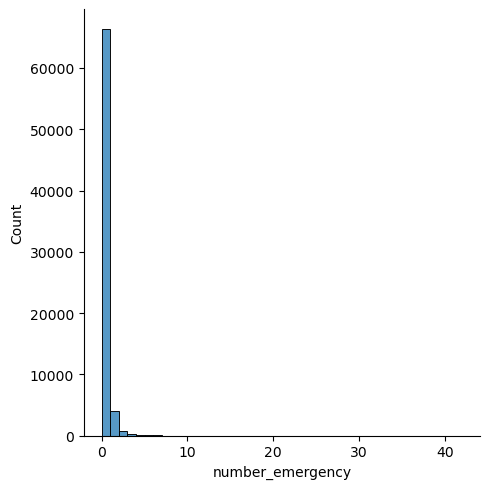

In [18]:
#| echo: false
sns.displot(data = data, x = 'number_emergency', kind = 'hist',binwidth=1) # 'kind =' is necessary for displot, not necessary for histplot()

plt.show()

Number of Lab Procedures:

## Exploratory Data Analysis

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

### Analysis 1
*By \<Name of person doing the analysis>*


### Analysis 2
By Yuki Han

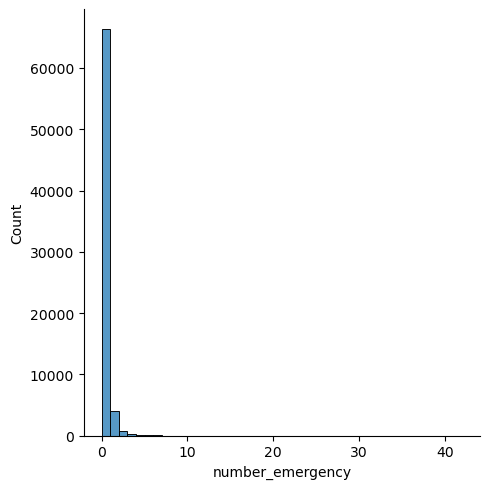

In [19]:
#| echo: false
sns.displot(data = data, x = 'number_emergency', kind = 'hist',binwidth=1) # 'kind =' is necessary for displot, not necessary for histplot()

plt.show()

Looking at the distribution of this varaible, it was demonstrated on the histogram that most of the patients eventually admitted to the hospital for diabetes never visited the emergency room prior to admission, as the distribution is heavily skewed. 

#### Are any of the demographics are associated with the number of emergency visits

From this distribution, it leads to the question of whether any of the demographics are associated with the number of emergency visits. In order to do this, I plotted the number of emergency visits by age and gender, as shown below. 

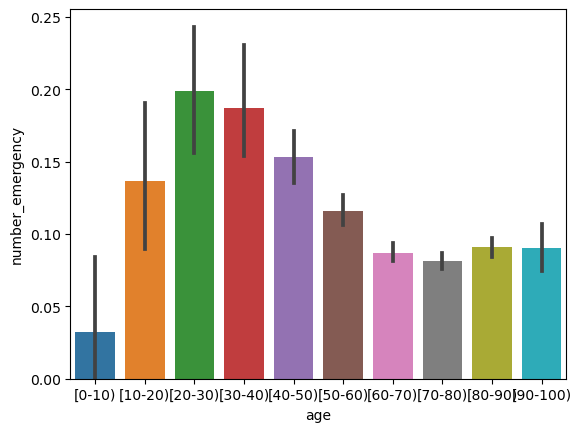

In [20]:
#| echo: false
sns.barplot(x="age", y="number_emergency", data = data)
plt.show()

In [8]:
data.groupby("age")['number_emergency'].agg(['mean','std'])

,mean,std
age,,
[0-10),0.032468,0.266147
[10-20),0.136449,0.598123
[20-30),0.198758,0.765299
[30-40),0.187106,1.019184
[40-50),0.153242,0.732161
[50-60),0.115915,0.550353
[60-70),0.087161,0.412986
[70-80),0.081503,0.395438
[80-90),0.090862,0.360900


By age group, it is shown that patients with an age range from 20 to 50 (M(20-30)= 0.20, M(30-40)= 0.19, M(40-50)= 0.15) have a higher average of emergency visits compared to other age groups. 


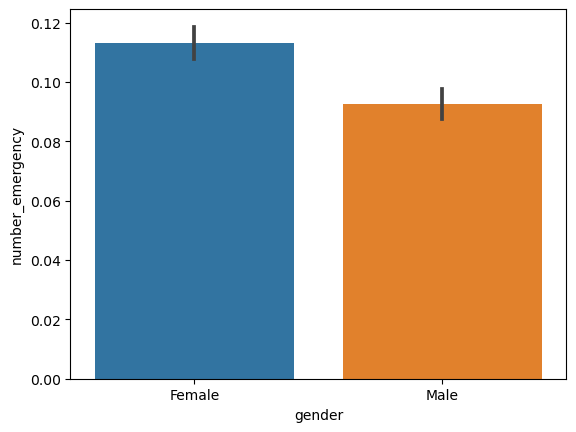

In [9]:
sns.barplot(x="gender", y="number_emergency", data = data)
plt.show()

In [10]:
data.groupby("gender")['number_emergency'].agg(['mean','std'])

,mean,std
gender,,
Female,0.113241,0.539966
Male,0.092535,0.471602


It is shown that by gender group, female (M= 0.11, SD = 0.54) has a higher average number of emergency visits compared to male (M =0.09, SD = 0.47): 

#### Demographics of patients who have never been to emergency visits by age group

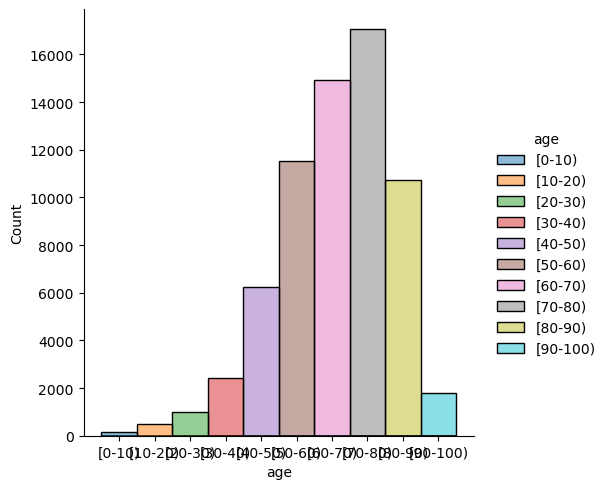

In [13]:
sns.displot(data = subset2, x = 'age', kind = 'hist',hue='age') # 'kind =' is necessary for displot, not necessary for histplot()

plt.show()

It is shown here that a lot of patients at the age range from 50 to 90 never went to the emergency room before. The difference in average emergency room visits by age groups can provide important information in preparing and distributing medical resources in the emergency room. Moreover, the difference in number of emergency visits by gender and age may also indicate the difference in the development of symptoms over time in terms of different demographics backgrounds.


#### Correlation between the number of emergency visits and the number of inpatient treatment before admission to hospital

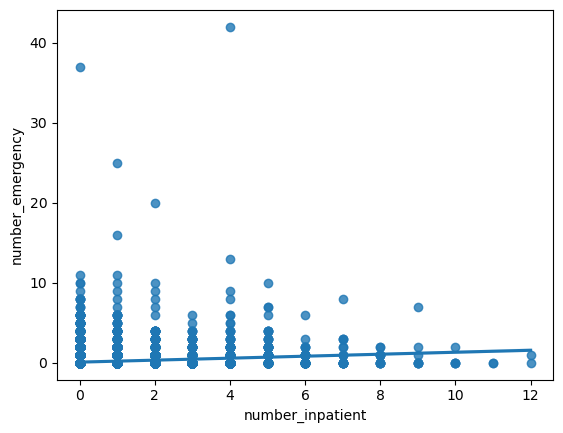

In [14]:
sns.regplot(data = data, x = 'number_inpatient', y='number_emergency') 
# sns.histplot() also works
plt.show()

From the distribution plot, we see that there is a positive correlation between the number of emergency visits and the number of inpatient treatment before admission to hospital, r= 0.15. 


#### Conclusion

To conclude, we can see that the number of emergency visits, although does not have large variance, can still provide important information on how to optimize the health system for the benefits of both stakeholders and patients based on demographics. 


### Analysis 3
*By \<Name of person doing the analysis>*


## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

## Recommendations to stakeholder(s)
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

## References {-}

[1]  Clore,John, Cios,Krzysztof, DeShazo,Jon, and Strack,Beata. (2014). Diabetes 130-US hospitals for years 1999-2008. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J.
